## Importing required libraries

In [211]:
import pandas as pd
import numpy as np

import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING) 

# Converting date columns value in date time datatype
## Data Reading 

In [223]:
# reading covid_19_india file data
Covid_Summary = pd.read_csv('dataset/covid_19_india.csv')
Covid_Summary.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


<b>Converting date column to datetime datatype</b>

In [224]:
# Converting date columns value in date time datatype
Covid_Summary['Date'] = pd.to_datetime(Covid_Summary['Date'])

<b>Renaming columns</b>

In [225]:
Covid_Summary.rename(columns = {'State/UnionTerritory':'States'}, inplace = True)

In [226]:
Covid_Summary.columns

Index(['Sno', 'Date', 'Time', 'States', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')

<b>Checking null values</b>

In [227]:
# Checking null values
Covid_Summary.isnull().sum()

Sno                         0
Date                        0
Time                        0
States                      0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [228]:
Covid_Summary.shape

(18110, 9)

<b>Dropping unwanted columns</b>

In [231]:
# Dropping unwanted columns 
Covid_Summary = Covid_Summary.drop(['Sno','ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1)
Covid_Summary.head()

KeyError: "['Sno' 'ConfirmedIndianNational' 'ConfirmedForeignNational'] not found in axis"

<b>Calculating active value</b>

In [232]:
# Creating a new column "Active"
Covid_Summary['Active'] = Covid_Summary['Confirmed'] - Covid_Summary['Cured'] - Covid_Summary['Deaths']
Covid_Summary.tail()

,Date,Time,States,Cured,Deaths,Confirmed,Active
18105,2021-08-11,8:00 AM,Telangana,638410,3831,650353,8112
18106,2021-08-11,8:00 AM,Tripura,77811,773,80660,2076
18107,2021-08-11,8:00 AM,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,8:00 AM,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,8:00 AM,West Bengal,1506532,18252,1534999,10215


In [233]:
Covid_Summary.head()

,Date,Time,States,Cured,Deaths,Confirmed,Active
0,2020-01-30,6:00 PM,Kerala,0,0,1,1
1,2020-01-31,6:00 PM,Kerala,0,0,1,1
2,2020-02-01,6:00 PM,Kerala,0,0,2,2
3,2020-02-02,6:00 PM,Kerala,0,0,3,3
4,2020-02-03,6:00 PM,Kerala,0,0,3,3


<b>Dataset Information</b>

In [234]:
Covid_Summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       18110 non-null  datetime64[ns]
 1   Time       18110 non-null  object        
 2   States     18110 non-null  object        
 3   Cured      18110 non-null  int64         
 4   Deaths     18110 non-null  int64         
 5   Confirmed  18110 non-null  int64         
 6   Active     18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 990.5+ KB


After manipulating covid_summary data there are 2 categorical, 1 datetime, 1 float and 4 int values 

<b>Selecting maximum date data</b>

In [236]:
## maximum date
Covid_Summary['Date'].max()

Timestamp('2021-08-11 00:00:00')

In [237]:
# Selecting data according to the maximum date (2021)  
india_cases = Covid_Summary[Covid_Summary['Date'] == Covid_Summary['Date'].max()].copy().fillna(0)
india_cases.index = india_cases["States"] # setting state data as index
india_cases = india_cases.drop(['States', 'Time','Date'], axis=1) ## removing unwanted data

In [238]:
india_cases.head()

,Cured,Deaths,Confirmed,Active
States,,,,
Andaman and Nicobar Islands,7412,129,7548,7
Andhra Pradesh,1952736,13564,1985182,18882
Arunachal Pradesh,47821,248,50605,2536
Assam,559684,5420,576149,11045
Bihar,715352,9646,725279,281


<b>Looking at 2021 total cured, deaths, confirmed and active data</b>

In [76]:
# looking at 2021 total cured, deaths, confirmed and active data
df = pd.DataFrame(pd.to_numeric(india_cases.sum())).transpose()
df.style.background_gradient(cmap='BuGn',axis=1)

,Cured,Deaths,Confirmed,Active
0,31220981,429179,32036511,386351


<b>Storing confirmed, death and cured data<.b>

In [239]:
# storing confirmed, death and cured data according to the date
Trend = Covid_Summary.groupby(['Date'])['Confirmed', 'Deaths','Cured'].sum().reset_index() 
Trend.head()

,Date,Confirmed,Deaths,Cured
0,2020-01-30,1,0,0
1,2020-01-31,1,0,0
2,2020-02-01,2,0,0
3,2020-02-02,3,0,0
4,2020-02-03,3,0,0


<b>Cured, Deaths, Confirmed Trend bar</b>

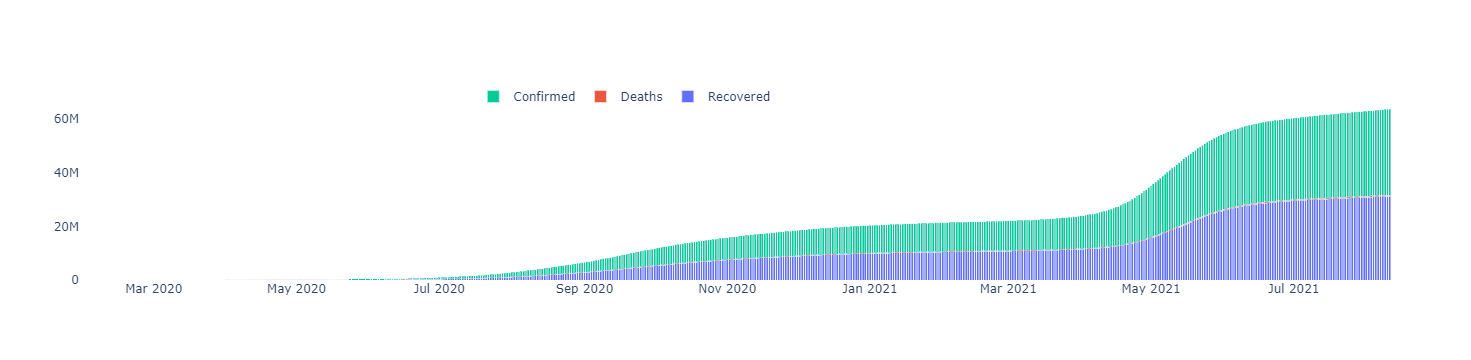

In [241]:
# plotting trend bar to observe the ratio 
fig = go.Figure(go.Bar(x= Trend.Date, y= Trend.Cured, name='Recovered'))
fig.add_trace(go.Bar(x=Trend.Date, y= Trend.Deaths, name='Deaths'))
fig.add_trace(go.Bar(x=Trend.Date, y= Trend.Confirmed, name='Confirmed'))

fig.update_layout(barmode='stack',legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                 paper_bgcolor='white',
                 plot_bgcolor = "white",)
fig.show()

<b>Method to plot bar chart</b>

In [244]:
# function to plot the data passed
def horizontal_bar_chart(df, x, y, title, x_label, y_label, color):
    fig = px.bar(df, x=x, y=y, orientation='h', title=title, 
                 labels={x.name: x_label,
                         y.name: y_label}, color_discrete_sequence=[color])
    fig.update_layout(yaxis={'categoryorder': 'total ascending'})
    fig.show()

<b>Top 10 Death States</b>

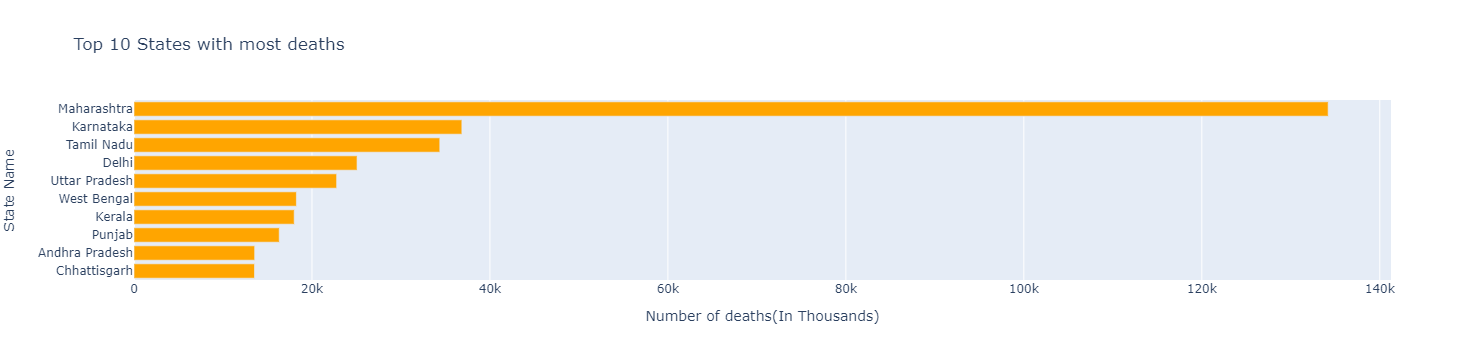

In [246]:
# calling horizontal_bar_chart and passing deaths value
top_10_death_states = india_cases.sort_values('Deaths',ascending = False)[:10]
horizontal_bar_chart(top_10_death_states,top_10_death_states.Deaths, top_10_death_states.index,
                     'Top 10 States with most deaths','Number of deaths(In Thousands)','State Name','Orange')

<b>Top 10 Confirmed States</b>

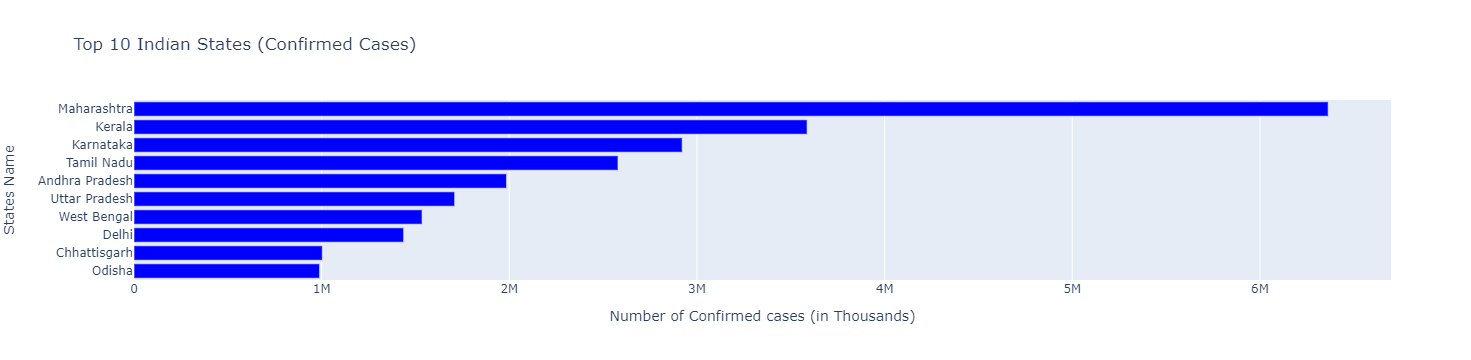

In [247]:
# calling horizontal_bar_chart and passing confirmed value
top_10_confirmed_states = india_cases.sort_values('Confirmed', ascending=False)[:10]
horizontal_bar_chart(top_10_confirmed_states,top_10_confirmed_states.Confirmed, top_10_confirmed_states.index,
            'Top 10 Indian States (Confirmed Cases)', 'Number of Confirmed cases (in Thousands)','States Name','blue')

<b>Top 10 Cured States</b>

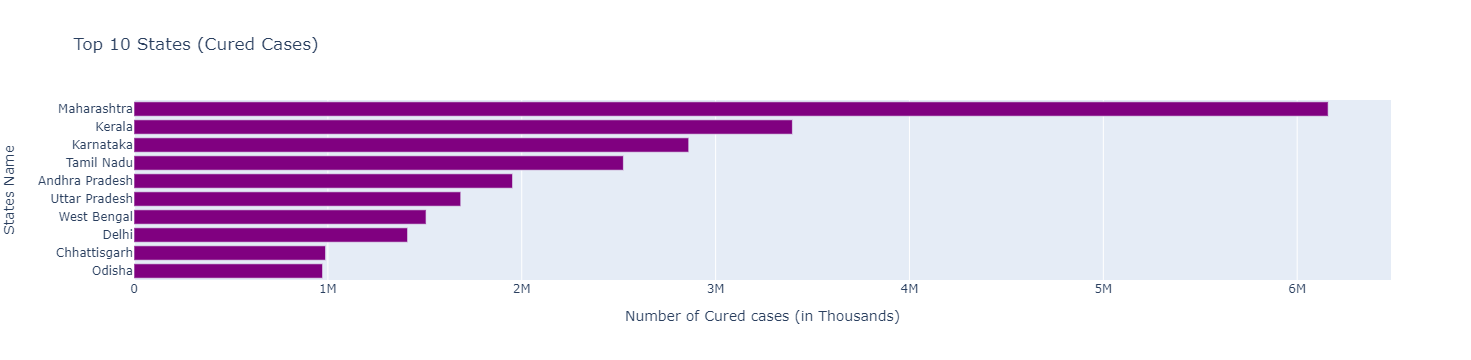

In [248]:
# calling horizontal_bar_chart and passing cured value
top_10_recovered_states = india_cases.sort_values('Cured', ascending=False)[:10]
horizontal_bar_chart(top_10_recovered_states, top_10_recovered_states.Cured, top_10_recovered_states.index,
                    'Top 10 States (Cured Cases)', 'Number of Cured cases (in Thousands)', 'States Name', 'Purple')

Since we know that maharashtra is most affected state of India lets look at other data of Maharashtra.
To proceed forward lets read vaccination data

<b>Observing Vaccination data on Maharashtra State</b>

In [249]:
vaccination = pd.read_csv("dataset/covid_vaccine_statewise.csv")
vaccination.tail()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7844,15/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
vaccination['Total Vaccinatons'] = vaccination['First Dose Administered']+vaccination['Second Dose Administered']

#Renaming columns
vaccination.rename(columns = {'Updated On':'Date'}, inplace = True)

In [251]:
Maharashtra = vaccination[vaccination["State"]=="Maharashtra"]
Maharashtra.columns

Index(['Date', 'State', 'Total Doses Administered', 'Sessions', ' Sites ',
       'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated', 'Total Vaccinatons'],
      dtype='object')

In [252]:
Maharashtra.isnull().sum()

Date                                     0
State                                    0
Total Doses Administered                 6
Sessions                                 6
 Sites                                   6
First Dose Administered                  6
Second Dose Administered                 6
Male (Doses Administered)                6
Female (Doses Administered)              6
Transgender (Doses Administered)         6
 Covaxin (Doses Administered)            6
CoviShield (Doses Administered)          6
Sputnik V (Doses Administered)         131
AEFI                                    65
18-44 Years (Doses Administered)       166
45-60 Years (Doses Administered)       166
60+ Years (Doses Administered)         166
18-44 Years(Individuals Vaccinated)    112
45-60 Years(Individuals Vaccinated)    111
60+ Years(Individuals Vaccinated)      111
Male(Individuals Vaccinated)           212
Female(Individuals Vaccinated)         212
Transgender(Individuals Vaccinated)    212
Total Indiv

In [253]:
Maharashtra.fillna(0, inplace=True)
Maharashtra.isnull().sum()

Date                                   0
State                                  0
Total Doses Administered               0
Sessions                               0
 Sites                                 0
First Dose Administered                0
Second Dose Administered               0
Male (Doses Administered)              0
Female (Doses Administered)            0
Transgender (Doses Administered)       0
 Covaxin (Doses Administered)          0
CoviShield (Doses Administered)        0
Sputnik V (Doses Administered)         0
AEFI                                   0
18-44 Years (Doses Administered)       0
45-60 Years (Doses Administered)       0
60+ Years (Doses Administered)         0
18-44 Years(Individuals Vaccinated)    0
45-60 Years(Individuals Vaccinated)    0
60+ Years(Individuals Vaccinated)      0
Male(Individuals Vaccinated)           0
Female(Individuals Vaccinated)         0
Transgender(Individuals Vaccinated)    0
Total Individuals Vaccinated           0
Total Vaccinaton

<b>Total vaccination provided on Maharashtra</b>

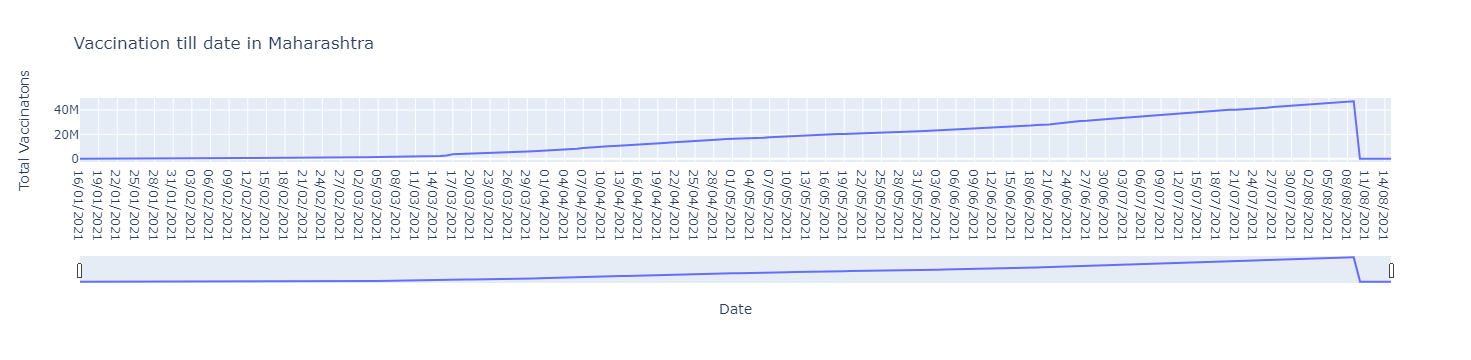

In [255]:
# looking at the total vaccination data provided on maharashtra state 
fig = px.line(Maharashtra,x="Date",y="Total Vaccinatons",title="Vaccination till date in Maharashtra")  
fig.update_xaxes(rangeslider_visible=True) 

<b>Total CoviShield vaccination provided on Maharashtra</b>

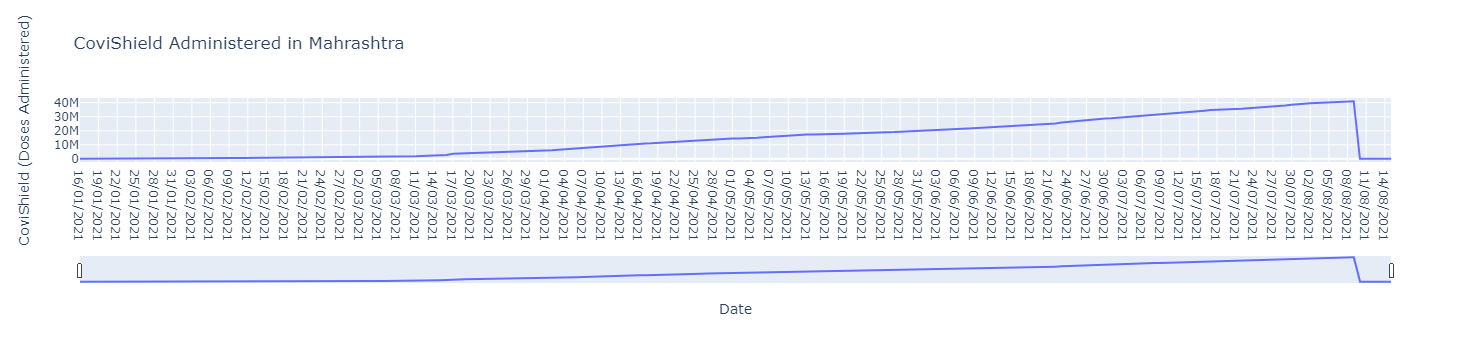

In [257]:
# looking at the CoviShield vaccination data provided on maharashtra state 
fig = px.line(Maharashtra,x="Date",y="CoviShield (Doses Administered)",title="CoviShield Administered in Mahrashtra")  
fig.update_xaxes(rangeslider_visible=True) 

<b>Total Covaxin vaccination provided on Maharashtra</b>

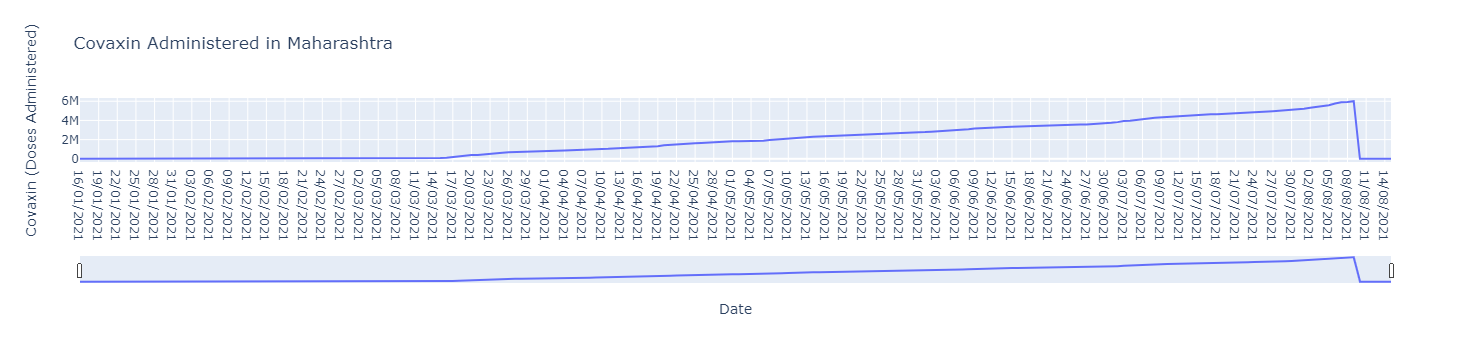

In [258]:
# looking at the Covaxin vaccination data provided on maharashtra state 
fig = px.line(Maharashtra,x="Date",y=" Covaxin (Doses Administered)",title="Covaxin Administered in Maharashtra")  
fig.update_xaxes(rangeslider_visible=True) 

We used the Prophet library, which was created by Facebook and is used for Time Series Forecasting, to make our predictions. Prophet is a time series data forecasting procedure based on an additive model that fits non-linear trends with yearly, weekly, and daily seasonality, as well as holiday effects. It works best with time series with strong seasonal effects and historical data from multiple seasons.

## FBProphet

In [259]:
# importing required prophet libraries
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
from plotly.offline import iplot, init_notebook_mode

##### Making model to predict and compare the confirmed data

In [263]:
model_confirmed = Prophet() # creating a prophet model

In [264]:
# storing confirmed data from trend
Confirmed = Trend.loc[:, ['Date', 'Confirmed']] 
Confirmed.tail()

,Date,Confirmed
555,2021-08-07,31895385
556,2021-08-08,31934455
557,2021-08-09,31969954
558,2021-08-10,31998158
559,2021-08-11,32036511


In [265]:
# Dataframe must have columns "Date" and "Values" with the dates and values  for prophet prediction
Confirmed.columns = ['ds', 'y']
model_confirmed.fit(Confirmed)

<b>Future 30 days date prediction</b>

In [270]:
future_confirmed = model_confirmed.make_future_dataframe(periods=30) # helper function to extend the dataframe for specified days
future_confirmed.tail()

,ds
585,2021-09-06
586,2021-09-07
587,2021-09-08
588,2021-09-09
589,2021-09-10


<b>Forcasting India confirmation data</b>

In [271]:
# yhat represents the prediction, while yhat_lower and yhat_upper represent the lower and upper bound
forecast_india_conf = model_confirmed.predict(future_confirmed)
forecast_india_conf

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-1.945281e+05,-1.882470e+06,1.373884e+06,-1.945281e+05,-1.945281e+05,20670.809283,20670.809283,20670.809283,20670.809283,20670.809283,20670.809283,0.0,0.0,0.0,-1.738573e+05
1,2020-01-31,-1.912244e+05,-1.813760e+06,1.493121e+06,-1.912244e+05,-1.912244e+05,15736.475838,15736.475838,15736.475838,15736.475838,15736.475838,15736.475838,0.0,0.0,0.0,-1.754879e+05
2,2020-02-01,-1.879207e+05,-1.877523e+06,1.380157e+06,-1.879207e+05,-1.879207e+05,10539.935153,10539.935153,10539.935153,10539.935153,10539.935153,10539.935153,0.0,0.0,0.0,-1.773807e+05
3,2020-02-02,-1.846169e+05,-1.797619e+06,1.506035e+06,-1.846169e+05,-1.846169e+05,4514.591868,4514.591868,4514.591868,4514.591868,4514.591868,4514.591868,0.0,0.0,0.0,-1.801023e+05
4,2020-02-03,-1.813132e+05,-1.811793e+06,1.440519e+06,-1.813132e+05,-1.813132e+05,-4087.407399,-4087.407399,-4087.407399,-4087.407399,-4087.407399,-4087.407399,0.0,0.0,0.0,-1.854006e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,2021-09-06,4.053997e+07,3.894307e+07,4.217985e+07,4.035517e+07,4.076871e+07,-4087.407399,-4087.407399,-4087.407399,-4087.407399,-4087.407399,-4087.407399,0.0,0.0,0.0,4.053588e+07
586,2021-09-07,4.070569e+07,3.907162e+07,4.230272e+07,4.051016e+07,4.095194e+07,-18976.383761,-18976.383761,-18976.383761,-18976.383761,-18976.383761,-18976.383761,0.0,0.0,0.0,4.068672e+07
587,2021-09-08,4.087142e+07,3.922471e+07,4.248277e+07,4.066043e+07,4.113260e+07,-28398.020981,-28398.020981,-28398.020981,-28398.020981,-28398.020981,-28398.020981,0.0,0.0,0.0,4.084302e+07
588,2021-09-09,4.103715e+07,3.936144e+07,4.277156e+07,4.081468e+07,4.131632e+07,20670.809283,20670.809283,20670.809283,20670.809283,20670.809283,20670.809283,0.0,0.0,0.0,4.105782e+07


The below image shows the basic prediction. The light blue is the uncertainty level(yhat_upper and yhat_lower), the dark blue is the prediction(yhat) and the black line is the original data.

<b>Basic line plot Forecast India Confirmation</b>

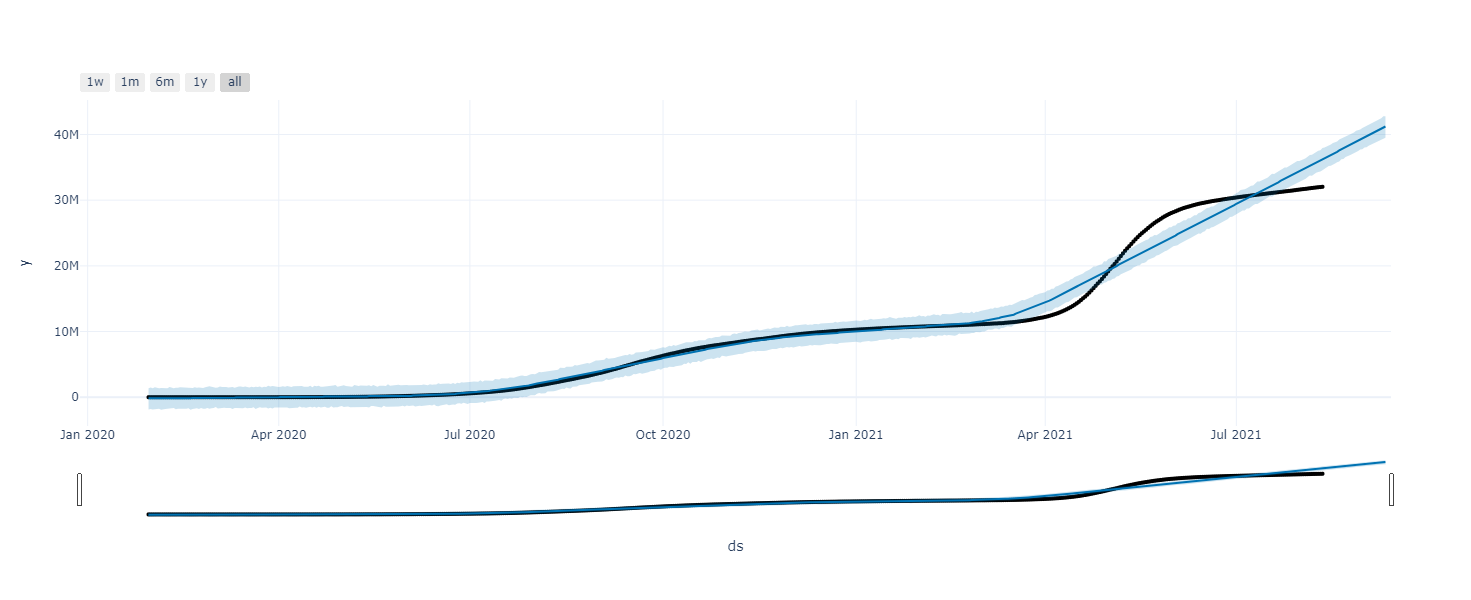

In [273]:
fig = plot_plotly(model_confirmed, forecast_india_conf) 
fig.update_layout(template='plotly_white')
iplot(fig) 

The images below depict the time series data's trends and seasonality (within a year).

<b>Forecasting India confirmation weekly and trend data</b>

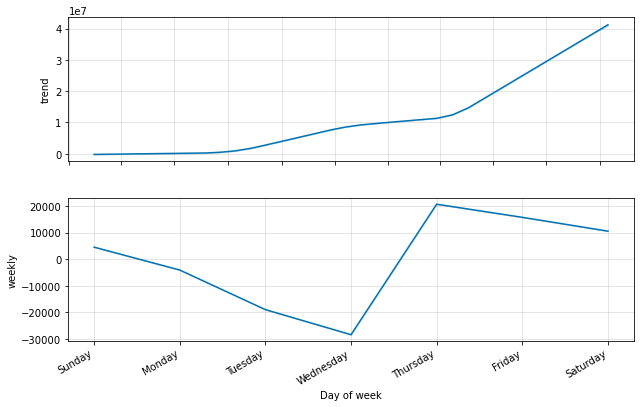

In [269]:
figure_confirmed=model_confirmed.plot_components(forecast_india_conf)
figure_confirmed.autofmt_xdate()

In rapid trend growths, changepoints are added to indicate the time. The dotted red lines indicate when there was a significant change in the passenger trend.

<b>Forecasting India confirmed data with changepoints</b>

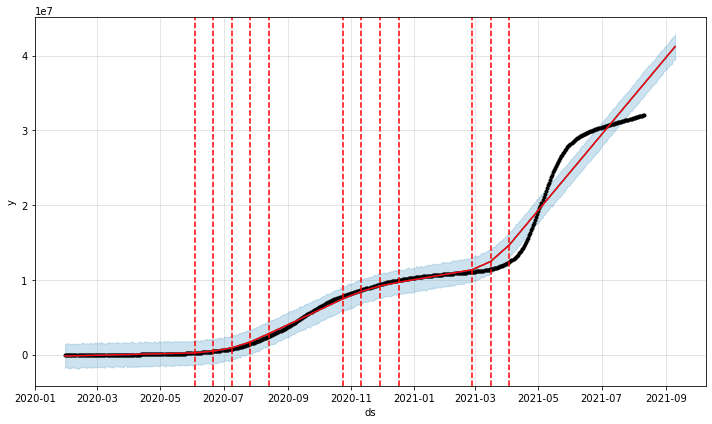

In [99]:
fig = model_confirmed.plot(forecast_india_conf)
a = add_changepoints_to_plot(fig.gca(), model_confirmed, forecast_india_conf)

Predicting the number of cases till Oct 2021, there will be more than 45 millions people who will be affected by coronavirus

##### Making model to predict and compare the cured data

In [100]:
model_cured = Prophet()

In [101]:
# storing cured data from trend
Cured = Trend.loc[:, ['Date', 'Cured']] 
Cured.tail()

,Date,Cured
555,2021-08-07,31055861
556,2021-08-08,31099771
557,2021-08-09,31139457
558,2021-08-10,31180968
559,2021-08-11,31220981


In [102]:
# Dataframe must have columns "Date" and "Values" with the dates and values  for prophet prediction
Cured.columns = ['ds', 'y']
Cured.tail()

,ds,y
555,2021-08-07,31055861
556,2021-08-08,31099771
557,2021-08-09,31139457
558,2021-08-10,31180968
559,2021-08-11,31220981


In [103]:
model_cured.fit(Cured)
future_cured = model_cured.make_future_dataframe(periods=30) # helper function to extend the dataframe for specified days
future_cured.tail()

,ds
585,2021-09-06
586,2021-09-07
587,2021-09-08
588,2021-09-09
589,2021-09-10


In [104]:
# yhat represents the prediction, while yhat_lower and yhat_upper represent the lower and upper bound
forecast_india_cured = model_cured.predict(future_cured)
forecast_india_cured

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-1.158339e+05,-1.527762e+06,1.158523e+06,-1.158339e+05,-1.158339e+05,20451.412190,20451.412190,20451.412190,20451.412190,20451.412190,20451.412190,0.0,0.0,0.0,-9.538248e+04
1,2020-01-31,-1.139421e+05,-1.596997e+06,1.329042e+06,-1.139421e+05,-1.139421e+05,13607.673366,13607.673366,13607.673366,13607.673366,13607.673366,13607.673366,0.0,0.0,0.0,-1.003344e+05
2,2020-02-01,-1.120502e+05,-1.485799e+06,1.270855e+06,-1.120502e+05,-1.120502e+05,7765.453372,7765.453372,7765.453372,7765.453372,7765.453372,7765.453372,0.0,0.0,0.0,-1.042848e+05
3,2020-02-02,-1.101584e+05,-1.453325e+06,1.295698e+06,-1.101584e+05,-1.101584e+05,2085.288507,2085.288507,2085.288507,2085.288507,2085.288507,2085.288507,0.0,0.0,0.0,-1.080731e+05
4,2020-02-03,-1.082666e+05,-1.395497e+06,1.261420e+06,-1.082666e+05,-1.082666e+05,-8067.857442,-8067.857442,-8067.857442,-8067.857442,-8067.857442,-8067.857442,0.0,0.0,0.0,-1.163345e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,2021-09-06,3.953173e+07,3.807146e+07,4.092274e+07,3.929258e+07,3.976177e+07,-8067.857442,-8067.857442,-8067.857442,-8067.857442,-8067.857442,-8067.857442,0.0,0.0,0.0,3.952366e+07
586,2021-09-07,3.970386e+07,3.825409e+07,4.114325e+07,3.944363e+07,3.994966e+07,-13767.146379,-13767.146379,-13767.146379,-13767.146379,-13767.146379,-13767.146379,0.0,0.0,0.0,3.969010e+07
587,2021-09-08,3.987600e+07,3.839691e+07,4.118324e+07,3.960173e+07,4.014776e+07,-22074.823614,-22074.823614,-22074.823614,-22074.823614,-22074.823614,-22074.823614,0.0,0.0,0.0,3.985393e+07
588,2021-09-09,4.004814e+07,3.862344e+07,4.154761e+07,3.975766e+07,4.033834e+07,20451.412190,20451.412190,20451.412190,20451.412190,20451.412190,20451.412190,0.0,0.0,0.0,4.006859e+07


The below image shows the basic prediction. The light blue is the uncertainty level(yhat_upper and yhat_lower), the dark blue is the prediction(yhat) and the black line is the original data.

<b>Basic line plot Forecast India Cured</b>

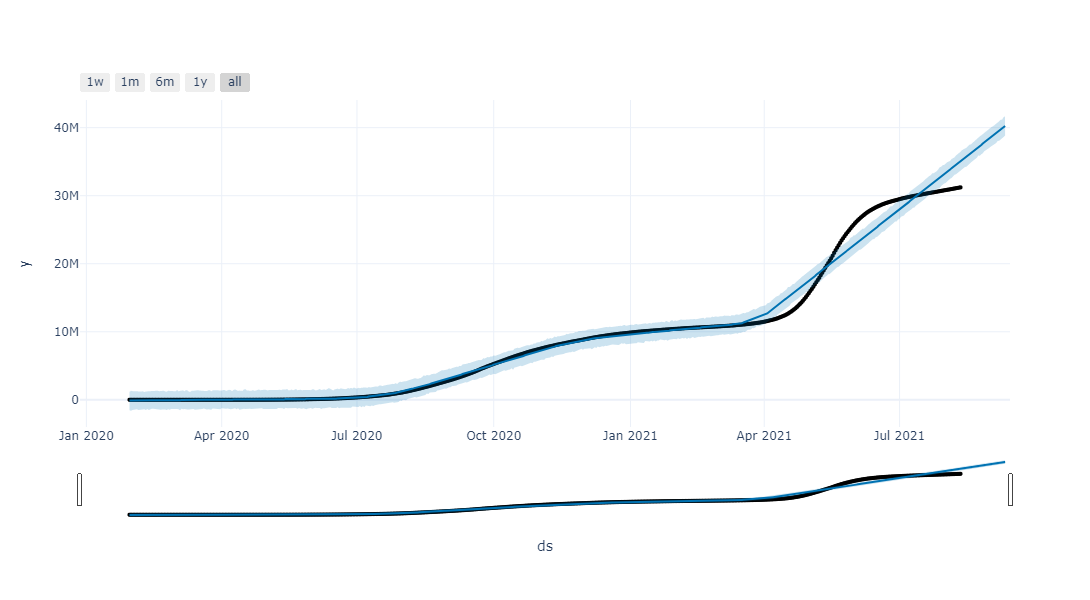

In [105]:
fig = plot_plotly(model_cured, forecast_india_cured) 

fig.update_layout(template='plotly_white')

iplot(fig)

The images below depict the time series data's trends and seasonality (within a year).

<b>Forecasting India Cured weekly and trend data</b>

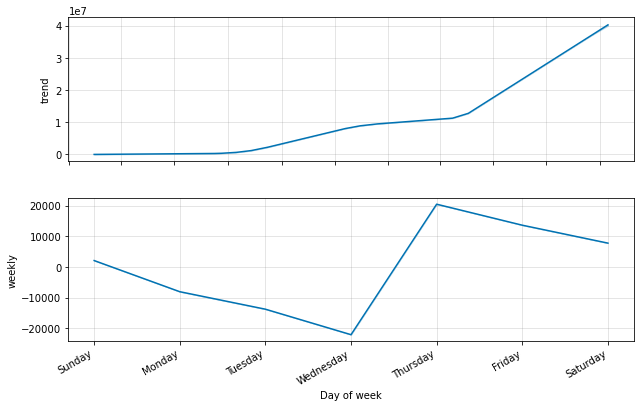

In [106]:
figure_cured=model_cured.plot_components(forecast_india_cured)
figure_cured.autofmt_xdate()

In rapid trend growths, changepoints are added to indicate the time. The dotted red lines indicate when there was a significant change in the passenger trend.

<b>Forecasting India cured data with changepoints</b>

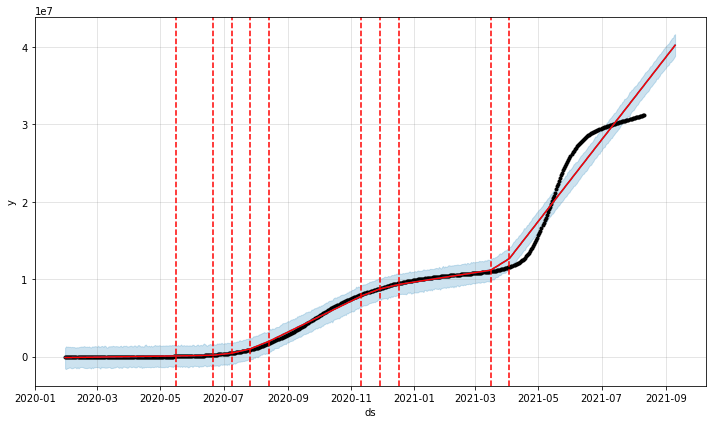

In [107]:
fig = model_cured.plot(forecast_india_cured)
a = add_changepoints_to_plot(fig.gca(), model_cured, forecast_india_cured)

Predicting number of cured till Oct 2021 will be more than 40 million

##### Making model to predict and compare the cured data

In [108]:
model_deaths = Prophet()

In [109]:
# storing deaths data from trend
Deaths = Trend.loc[:, ['Date', 'Deaths']] 
Deaths.tail()

,Date,Deaths
555,2021-08-07,427371
556,2021-08-08,427862
557,2021-08-09,428309
558,2021-08-10,428682
559,2021-08-11,429179


In [110]:
# Dataframe must have columns "Date" and "Values" with the dates and values  for prophet prediction
Deaths.columns = ['ds', 'y']
model_deaths.fit(Deaths)

future_deaths = model_deaths.make_future_dataframe(periods=30) # helper function to extend the dataframe for specified days
future_deaths.tail()

,ds
585,2021-09-06
586,2021-09-07
587,2021-09-08
588,2021-09-09
589,2021-09-10


In [111]:
# yhat represents the prediction, while yhat_lower and yhat_upper represent the lower and upper bound
forecast_india_death = model_deaths.predict(future_deaths)
forecast_india_death

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-2199.302798,-16376.386436,12269.285414,-2199.302798,-2199.302798,274.316839,274.316839,274.316839,274.316839,274.316839,274.316839,0.0,0.0,0.0,-1924.985959
1,2020-01-31,-2149.567673,-16077.698159,11797.025549,-2149.567673,-2149.567673,194.220341,194.220341,194.220341,194.220341,194.220341,194.220341,0.0,0.0,0.0,-1955.347332
2,2020-02-01,-2099.832549,-16745.062203,12556.371757,-2099.832549,-2099.832549,144.504564,144.504564,144.504564,144.504564,144.504564,144.504564,0.0,0.0,0.0,-1955.327985
3,2020-02-02,-2050.097425,-17155.700537,12473.905767,-2050.097425,-2050.097425,37.969937,37.969937,37.969937,37.969937,37.969937,37.969937,0.0,0.0,0.0,-2012.127488
4,2020-02-03,-2000.362300,-15626.812296,13230.897563,-2000.362300,-2000.362300,-93.461547,-93.461547,-93.461547,-93.461547,-93.461547,-93.461547,0.0,0.0,0.0,-2093.823847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,2021-09-06,537128.772850,521816.000991,552673.873327,534144.935637,540350.591303,-93.461547,-93.461547,-93.461547,-93.461547,-93.461547,-93.461547,0.0,0.0,0.0,537035.311303
586,2021-09-07,539499.684080,523696.091086,554449.943717,536391.056992,542978.508073,-260.003341,-260.003341,-260.003341,-260.003341,-260.003341,-260.003341,0.0,0.0,0.0,539239.680738
587,2021-09-08,541870.595309,527265.456863,555944.473660,538480.491753,545582.101753,-297.546792,-297.546792,-297.546792,-297.546792,-297.546792,-297.546792,0.0,0.0,0.0,541573.048517
588,2021-09-09,544241.506538,529950.136304,559962.825529,540515.798895,548198.354026,274.316839,274.316839,274.316839,274.316839,274.316839,274.316839,0.0,0.0,0.0,544515.823377


The below image shows the basic prediction. The light blue is the uncertainty level(yhat_upper and yhat_lower), the dark blue is the prediction(yhat) and the black line is the original data.

<b>Basic line plot Forecast India Deaths</b>

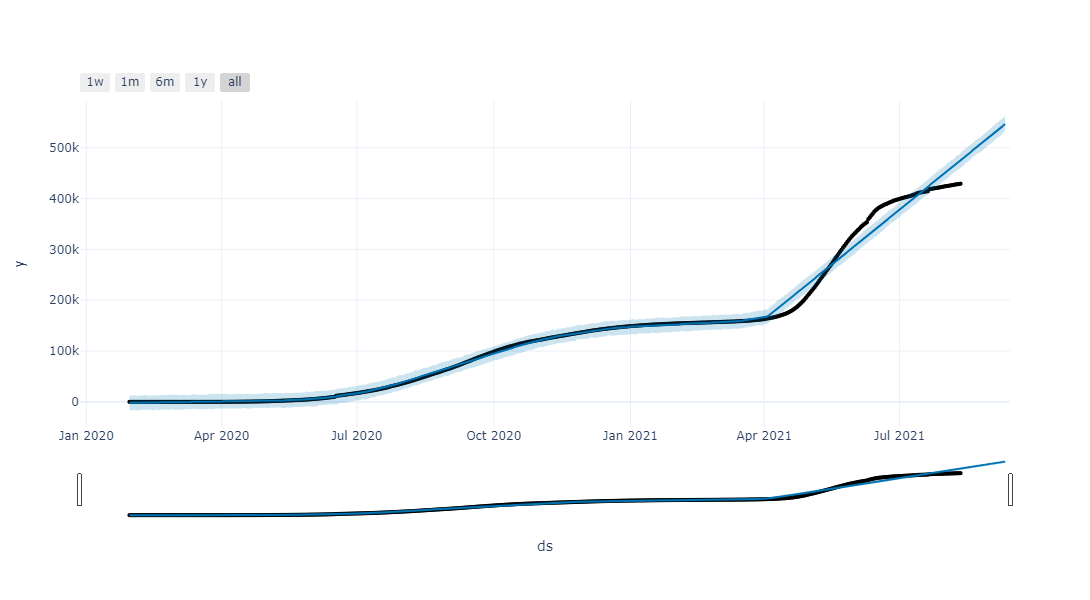

In [112]:
fig = plot_plotly(model_deaths, forecast_india_death)

fig.update_layout(template='plotly_white')

iplot(fig)



The images below depict the time series data's trends and seasonality (within a year).

<b>Forecasting India Deaths weekly and trend data</b>

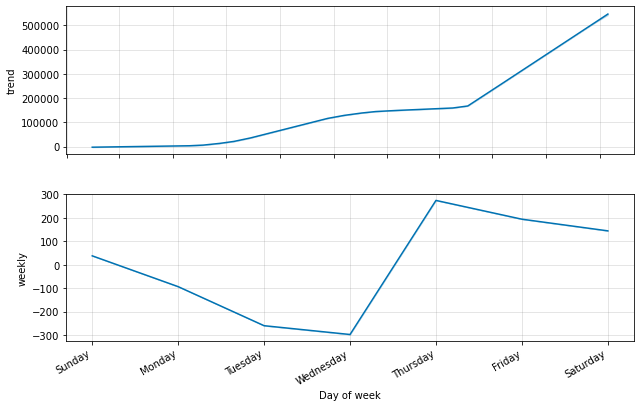

In [113]:
figure_deaths=model_deaths.plot_components(forecast_india_death)
figure_deaths.autofmt_xdate()

In rapid trend growths, changepoints are added to indicate the time. The dotted red lines indicate when there was a significant change in the passenger trend.

<b>Forecasting India deaths data with changepoints</b>

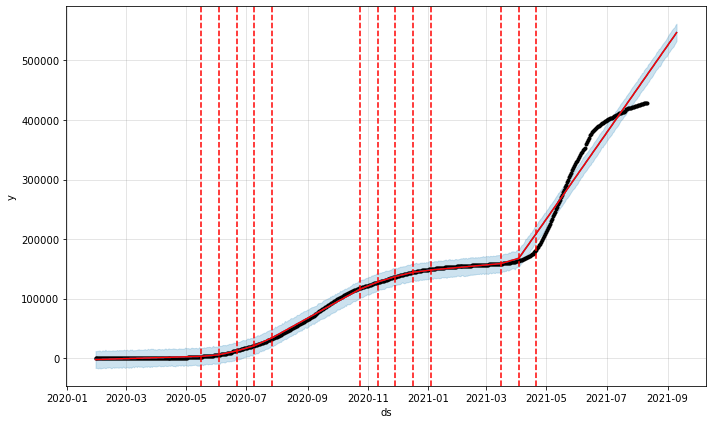

In [114]:
fig = model_deaths.plot(forecast_india_death)
a = add_changepoints_to_plot(fig.gca(), model_deaths, forecast_india_death)

Predicting number of deaths till Oct 2021 will be more than 600k. We can see that current situation of the India is not under control.

### Accuracy testing by taking kerela states

<b>Copying origingal dataset</b>

In [283]:
data = Covid_Summary
data['Date'] = pd.to_datetime(data['Date'])
data = data.rename(columns={'Date':'ds','Cured':'y'})
data.head()

,ds,Time,States,y,Deaths,Confirmed,Active
0,2020-01-30,6:00 PM,Kerala,0,0,1,1
1,2020-01-31,6:00 PM,Kerala,0,0,1,1
2,2020-02-01,6:00 PM,Kerala,0,0,2,2
3,2020-02-02,6:00 PM,Kerala,0,0,3,3
4,2020-02-03,6:00 PM,Kerala,0,0,3,3


<b>Removing unwanted state data</b>

In [284]:
def drop_star(df):
    for i in data['States'].iteritems():
        if i[1][-3:] == "***":
            data.drop(i[0],inplace=True)
        
drop_star(Covid_Summary)
data['States'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli',
       'Himanchal Pradesh', 'Karanataka'], dtype=object)

<b>Observing maximum and minimum data</b>

In [285]:
max(data["ds"])

Timestamp('2021-08-11 00:00:00')

In [286]:
min(data["ds"])

Timestamp('2020-01-30 00:00:00')

<b>Seperating training and testing data</b>

In [287]:
train = data[data['ds']<'2021-03-11']
test = data[data['ds']>='2021-03-11']

In [288]:
train.shape

(12566, 7)

In [289]:
test.shape

(5540, 7)

In [290]:
train.head()

,ds,Time,States,y,Deaths,Confirmed,Active
0,2020-01-30,6:00 PM,Kerala,0,0,1,1
1,2020-01-31,6:00 PM,Kerala,0,0,1,1
2,2020-02-01,6:00 PM,Kerala,0,0,2,2
3,2020-02-02,6:00 PM,Kerala,0,0,3,3
4,2020-02-03,6:00 PM,Kerala,0,0,3,3


<b>Forecasting Kerala data with prophet prediction</b>

In [291]:
train_sub = train[train['States']=='Kerala']
test_sub = test[test['States']=='Kerala']

m = Prophet()
m.fit(train_sub)

future = m.make_future_dataframe(periods=30, freq="d")
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-9.703408e+01,-3.413715e+03,3.263375e+03,-9.703408e+01,-9.703408e+01,112.166231,112.166231,112.166231,112.166231,112.166231,112.166231,0.0,0.0,0.0,1.513216e+01
1,2020-01-31,-9.393595e+01,-3.461327e+03,3.306412e+03,-9.393595e+01,-9.393595e+01,94.673872,94.673872,94.673872,94.673872,94.673872,94.673872,0.0,0.0,0.0,7.379257e-01
2,2020-02-01,-9.083782e+01,-3.213164e+03,3.146168e+03,-9.083782e+01,-9.083782e+01,37.147985,37.147985,37.147985,37.147985,37.147985,37.147985,0.0,0.0,0.0,-5.368983e+01
3,2020-02-02,-8.773969e+01,-3.592012e+03,3.239004e+03,-8.773969e+01,-8.773969e+01,56.673879,56.673879,56.673879,56.673879,56.673879,56.673879,0.0,0.0,0.0,-3.106581e+01
4,2020-02-03,-8.464156e+01,-3.383121e+03,3.396032e+03,-8.464156e+01,-8.464156e+01,13.688051,13.688051,13.688051,13.688051,13.688051,13.688051,0.0,0.0,0.0,-7.095351e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,2021-04-05,1.185537e+06,1.174469e+06,1.199103e+06,1.174663e+06,1.198520e+06,13.688051,13.688051,13.688051,13.688051,13.688051,13.688051,0.0,0.0,0.0,1.185550e+06
432,2021-04-06,1.190764e+06,1.178365e+06,1.204259e+06,1.179194e+06,1.204806e+06,-150.791339,-150.791339,-150.791339,-150.791339,-150.791339,-150.791339,0.0,0.0,0.0,1.190614e+06
433,2021-04-07,1.195992e+06,1.183801e+06,1.210673e+06,1.183690e+06,1.210667e+06,-163.558678,-163.558678,-163.558678,-163.558678,-163.558678,-163.558678,0.0,0.0,0.0,1.195829e+06
434,2021-04-08,1.201220e+06,1.187908e+06,1.217090e+06,1.188287e+06,1.216643e+06,112.166231,112.166231,112.166231,112.166231,112.166231,112.166231,0.0,0.0,0.0,1.201332e+06


<b>Basic forcasted line plot of Kerala</b>

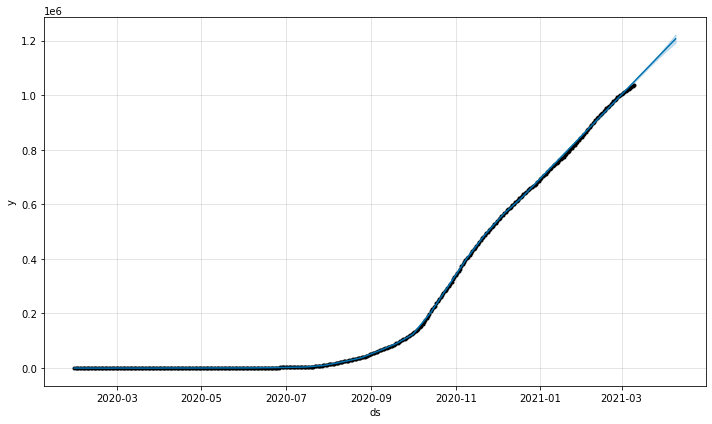

In [293]:
fig = m.plot(forecast)

<b>Accuracy testing</b>

In [294]:
forecast_sub = forecast[["ds","yhat"]]
forecast_sub["ds"] = forecast_sub["ds"].astype(str)
forecast_sub.shape

(436, 2)

In [295]:
test_sub = test_sub[["ds","y"]]
test_sub["ds"] = test_sub["ds"].astype(str)
test_sub.shape

(154, 2)

In [296]:
eval_df = test_sub.merge(forecast_sub, on=['ds'], how='left')
eval_df['abs_error'] = abs(eval_df['y'] - eval_df['yhat'])
eval_df['daily_FA'] = 1-(eval_df['abs_error']/eval_df['y'])
eval_df.dropna(inplace=True)

In [297]:
total_y = sum(eval_df["y"])
total_error = sum(eval_df["abs_error"])
print(total_y , total_error)

32402424 1517167.9528269023


In [202]:
forecast_acc = 1-(total_error/total_y)
print(forecast_acc)

0.9531773316457157


Here we got 95 percentage of accuracy on forcasted data which is good

### Checking forecasting accuracy for top 5 populated states

In [298]:
pop_list = ["Uttar Pradesh", "Maharashtra", "Bihar", "West Bengal", "Madhya Pradesh"]
pop_list

['Uttar Pradesh', 'Maharashtra', 'Bihar', 'West Bengal', 'Madhya Pradesh']

In [299]:
train = data[data['ds']<'2021-03-11']
test = data[data['ds']>='2021-03-11']

In [300]:
for state in pop_list:
    train_sub = train[train['States']==state]
    test_sub = test[test['States']==state]

    m = Prophet(daily_seasonality=False)
    m.fit(train_sub)

    future = m.make_future_dataframe(periods=30, freq="d")
    forecast = m.predict(future)
    
    forecast_sub = forecast[["ds","yhat"]]
    forecast_sub["ds"] = forecast_sub["ds"].astype(str)
    test_sub = test_sub[["ds","y"]]
    test_sub["ds"] = test_sub["ds"].astype(str)

    eval_df = test_sub.merge(forecast_sub, on=['ds'], how='left')
    eval_df['abs_error'] = abs(eval_df['y'] - eval_df['yhat'])
    eval_df['daily_FA'] = 1-(eval_df['abs_error']/eval_df['y'])
    eval_df.dropna(inplace=True)
    total_y = sum(eval_df["y"])
    total_error = sum(eval_df["abs_error"])
    forecast_acc = 1-(total_error/total_y)
    print(state+ ": " + str(forecast_acc))
    

Uttar Pradesh: 0.9810909368947742
Maharashtra: 0.9159660536396657
Bihar: 0.9770128540772085
West Bengal: 0.9860752640040191
Madhya Pradesh: 0.9830944209538308


##### Here we can see the forecasting  accuracy percentage of top 5 populated areas are more than 90 percentage.